In [1]:
# Data Analysis of COVID-19 

## understanding the data 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [3]:
data = pd.read_csv('2019_nCoV_data.csv')
data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [4]:
data.shape 

(1719, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 8 columns):
Sno               1719 non-null int64
Date              1719 non-null object
Province/State    1257 non-null object
Country           1719 non-null object
Last Update       1719 non-null object
Confirmed         1719 non-null float64
Deaths            1719 non-null float64
Recovered         1719 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 107.6+ KB


In [6]:
data.columns

Index(['Sno', 'Date', 'Province/State', 'Country', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [7]:
data.drop('Sno', axis=1, inplace=True)
data.drop('Last Update', axis =1, inplace= True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 6 columns):
Date              1719 non-null object
Province/State    1257 non-null object
Country           1719 non-null object
Confirmed         1719 non-null float64
Deaths            1719 non-null float64
Recovered         1719 non-null float64
dtypes: float64(3), object(3)
memory usage: 80.7+ KB


In [8]:
data.describe()

,Confirmed,Deaths,Recovered
count,1719.000000,1719.000000,1719.000000
mean,454.596859,10.441536,44.361838
std,3712.529032,106.638286,351.078713
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,12.000000,0.000000,0.000000
75%,109.000000,0.000000,7.000000
max,59989.000000,1789.000000,7862.000000


In [10]:
print(len(data.columns))
data.columns

6


Index(['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths',
       'Recovered'],
      dtype='object')

In [12]:
duplicate_rows = data.duplicated(['Country','Province/State','Date'])

duplicate_rows.sum()

0

In [13]:
data[duplicate_rows]

,Date,Province/State,Country,Confirmed,Deaths,Recovered


In [18]:
country_list = data['Country'].unique().tolist()
print(len(country_list))
country_list

34


['China',
 'US',
 'Japan',
 'Thailand',
 'South Korea',
 'Mainland China',
 'Hong Kong',
 'Macau',
 'Taiwan',
 'Singapore',
 'Philippines',
 'Malaysia',
 'Vietnam',
 'Australia',
 'Mexico',
 'Brazil',
 'France',
 'Nepal',
 'Canada',
 'Cambodia',
 'Sri Lanka',
 'Ivory Coast',
 'Germany',
 'Finland',
 'United Arab Emirates',
 'India',
 'Italy',
 'Sweden',
 'Russia',
 'Spain',
 'UK',
 'Belgium',
 'Others',
 'Egypt']

In [19]:
data.columns

Index(['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths',
       'Recovered'],
      dtype='object')

In [20]:
data.groupby('Country').count()
# Mainland China
# China 

,Date,Province/State,Confirmed,Deaths,Recovered
Country,,,,,
Australia,84,81,84,84,84
Belgium,14,0,14,14,14
Brazil,1,0,1,1,1
Cambodia,22,0,22,22,22
Canada,59,59,59,59,59
China,34,34,34,34,34
Egypt,4,0,4,4,4
Finland,20,0,20,20,20
France,25,0,25,25,25


In [ ]:
# Mainland China
# China 

In [23]:
# only consider China and mainland China 

df_main = data.loc[data['Country']=='Mainland China']
df_main

,Date,Province/State,Country,Confirmed,Deaths,Recovered
38,01/23/2020 12:00:00,Anhui,Mainland China,9.0,0.0,0.0
39,01/23/2020 12:00:00,Beijing,Mainland China,22.0,0.0,0.0
40,01/23/2020 12:00:00,Chongqing,Mainland China,9.0,0.0,0.0
41,01/23/2020 12:00:00,Fujian,Mainland China,5.0,0.0,0.0
42,01/23/2020 12:00:00,Gansu,Mainland China,2.0,0.0,0.0
...,...,...,...,...,...,...
1672,02/17/2020 22:00:00,Xinjiang,Mainland China,75.0,1.0,12.0
1673,02/17/2020 22:00:00,Inner Mongolia,Mainland China,72.0,0.0,8.0
1674,02/17/2020 22:00:00,Ningxia,Mainland China,70.0,0.0,35.0
1681,02/17/2020 22:00:00,Qinghai,Mainland China,18.0,0.0,13.0


In [25]:
df_china = data.loc[data['Country']=='China']
df_china

,Date,Province/State,Country,Confirmed,Deaths,Recovered
0,01/22/2020 12:00:00,Anhui,China,1.0,0.0,0.0
1,01/22/2020 12:00:00,Beijing,China,14.0,0.0,0.0
2,01/22/2020 12:00:00,Chongqing,China,6.0,0.0,0.0
3,01/22/2020 12:00:00,Fujian,China,1.0,0.0,0.0
4,01/22/2020 12:00:00,Gansu,China,0.0,0.0,0.0
5,01/22/2020 12:00:00,Guangdong,China,26.0,0.0,0.0
6,01/22/2020 12:00:00,Guangxi,China,2.0,0.0,0.0
7,01/22/2020 12:00:00,Guizhou,China,1.0,0.0,0.0
8,01/22/2020 12:00:00,Hainan,China,4.0,0.0,0.0
9,01/22/2020 12:00:00,Hebei,China,1.0,0.0,0.0


In [29]:
df = df_main.append(df_china)
df

,Date,Province/State,Country,Confirmed,Deaths,Recovered
38,01/23/2020 12:00:00,Anhui,Mainland China,9.0,0.0,0.0
39,01/23/2020 12:00:00,Beijing,Mainland China,22.0,0.0,0.0
40,01/23/2020 12:00:00,Chongqing,Mainland China,9.0,0.0,0.0
41,01/23/2020 12:00:00,Fujian,Mainland China,5.0,0.0,0.0
42,01/23/2020 12:00:00,Gansu,Mainland China,2.0,0.0,0.0
...,...,...,...,...,...,...
29,01/22/2020 12:00:00,Tianjin,China,4.0,0.0,0.0
30,01/22/2020 12:00:00,Tibet,China,0.0,0.0,0.0
32,01/22/2020 12:00:00,Xinjiang,China,0.0,0.0,0.0
33,01/22/2020 12:00:00,Yunnan,China,1.0,0.0,0.0


In [37]:
print(len(df['Date'].unique()))

df['Date'].unique()

27


array(['01/23/2020 12:00:00', '01/24/2020 12:00:00',
       '01/25/2020 22:00:00', '01/26/2020 23:00:00',
       '01/27/2020 20:30:00', '01/28/2020 23:00:00',
       '01/29/2020 21:00:00', '01/30/2020 21:30:00',
       '01/31/2020 19:00:00', '02/01/2020 23:00:00',
       '02/02/2020 21:00:00', '02/03/2020 21:40:00',
       '02/04/2020 22:00:00', '02/05/2020 12:20:00',
       '02/06/2020 20:05:00', '02/07/2020 20:24:00',
       '02/08/2020 23:04:00', '02/09/2020 23:20:00',
       '02/10/2020 19:30:00', '02/11/2020 20:44:00',
       '02/12/2020 22:00:00', '02/13/2020 21:15:00',
       '02/14/2020 22:00:00', '02/15/2020 22:00:00',
       '02/16/2020 22:00:00', '02/17/2020 22:00:00',
       '01/22/2020 12:00:00'], dtype=object)

In [38]:
df['Date']=pd.to_datetime(df['Date'])

df['Date']

38   2020-01-23 12:00:00
39   2020-01-23 12:00:00
40   2020-01-23 12:00:00
41   2020-01-23 12:00:00
42   2020-01-23 12:00:00
             ...        
29   2020-01-22 12:00:00
30   2020-01-22 12:00:00
32   2020-01-22 12:00:00
33   2020-01-22 12:00:00
34   2020-01-22 12:00:00
Name: Date, Length: 835, dtype: datetime64[ns]

In [39]:
df['Date_date'] = df['Date'].apply(lambda x: x.date())

df

,Date,Province/State,Country,Confirmed,Deaths,Recovered,Date_date
38,2020-01-23 12:00:00,Anhui,Mainland China,9.0,0.0,0.0,2020-01-23
39,2020-01-23 12:00:00,Beijing,Mainland China,22.0,0.0,0.0,2020-01-23
40,2020-01-23 12:00:00,Chongqing,Mainland China,9.0,0.0,0.0,2020-01-23
41,2020-01-23 12:00:00,Fujian,Mainland China,5.0,0.0,0.0,2020-01-23
42,2020-01-23 12:00:00,Gansu,Mainland China,2.0,0.0,0.0,2020-01-23
...,...,...,...,...,...,...,...
29,2020-01-22 12:00:00,Tianjin,China,4.0,0.0,0.0,2020-01-22
30,2020-01-22 12:00:00,Tibet,China,0.0,0.0,0.0,2020-01-22
32,2020-01-22 12:00:00,Xinjiang,China,0.0,0.0,0.0,2020-01-22
33,2020-01-22 12:00:00,Yunnan,China,1.0,0.0,0.0,2020-01-22


In [44]:
df_country = data.groupby(['Country']).max().reset_index()

print(df_country.columns)

df_country[['Country', 'Confirmed', 'Deaths', 'Recovered']]

Index(['Country', 'Date', 'Confirmed', 'Deaths', 'Recovered', 'Date_date'], dtype='object')


,Country,Confirmed,Deaths,Recovered
0,Australia,5.0,0.0,4.0
1,Belgium,1.0,0.0,1.0
2,Brazil,0.0,0.0,0.0
3,Cambodia,1.0,0.0,1.0
4,Canada,5.0,0.0,1.0
5,China,444.0,0.0,0.0
6,Egypt,1.0,0.0,0.0
7,Finland,1.0,0.0,1.0
8,France,12.0,1.0,4.0
9,Germany,16.0,0.0,1.0


In [45]:
df_by_date = data.groupby(['Date_date']).sum().reset_index(drop=None)

df_by_date

,Date_date,Confirmed,Deaths,Recovered
0,2020-01-22,555.0,0.0,0.0
1,2020-01-23,653.0,18.0,30.0
2,2020-01-24,941.0,26.0,36.0
3,2020-01-25,2019.0,56.0,49.0
4,2020-01-26,2794.0,80.0,54.0
5,2020-01-27,4473.0,107.0,63.0
6,2020-01-28,6057.0,132.0,110.0
7,2020-01-29,7783.0,170.0,133.0
8,2020-01-30,9776.0,213.0,187.0
9,2020-01-31,11374.0,259.0,252.0


In [46]:
df_by_date.columns

Index(['Date_date', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

In [47]:
#df_by_date= data.groupby(['Date_date']).sum().reset_index(drop=None)

df_by_date['daily_cases'] = df_by_date.Confirmed.diff()

df_by_date['daily_deaths'] = df_by_date.Deaths.diff()

df_by_date['daily_recoveries'] = df_by_date.Recovered.diff()

df_by_date

,Date_date,Confirmed,Deaths,Recovered,daily_cases,daily_deaths,daily_recoveries
0,2020-01-22,555.0,0.0,0.0,NaN,NaN,NaN
1,2020-01-23,653.0,18.0,30.0,98.0,18.0,30.0
2,2020-01-24,941.0,26.0,36.0,288.0,8.0,6.0
3,2020-01-25,2019.0,56.0,49.0,1078.0,30.0,13.0
4,2020-01-26,2794.0,80.0,54.0,775.0,24.0,5.0
5,2020-01-27,4473.0,107.0,63.0,1679.0,27.0,9.0
6,2020-01-28,6057.0,132.0,110.0,1584.0,25.0,47.0
7,2020-01-29,7783.0,170.0,133.0,1726.0,38.0,23.0
8,2020-01-30,9776.0,213.0,187.0,1993.0,43.0,54.0
9,2020-01-31,11374.0,259.0,252.0,1598.0,46.0,65.0


## plotting the data 

In [49]:
sns.axes_style('whitegrid')

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'grid.color': '.8',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

In [50]:
data.columns

Index(['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered',
       'Date_date'],
      dtype='object')

Text(0.5, 0, 'Dates')

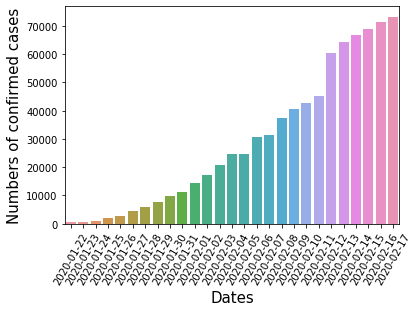

In [52]:
sns.barplot(
x= "Date_date",
y = "Confirmed",
data = data.groupby(['Date_date']).sum().reset_index(drop=None))

plt.xticks(rotation=60)
plt.ylabel('Numbers of confirmed cases', fontsize =15)
plt.xlabel('Dates', fontsize=15)

In [55]:
# death vs rate of recovery 

data_1 = pd.read_csv('2019_nCoV_data.csv')

data_1.rename(columns={'Last Update':'date_updated'}, inplace = True)
data_1.columns

Index(['Sno', 'Date', 'Province/State', 'Country', 'date_updated', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [59]:
data_1['date_updated']=pd.to_datetime(data_1['date_updated'])

data_1['date_updated'] = data_1['date_updated'].apply(lambda x: x.date())

data_1

,Sno,Date,Province/State,Country,date_updated,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,2020-01-22,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,2020-01-22,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,2020-01-22,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,2020-01-22,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,2020-01-22,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1714,1715,02/17/2020 22:00:00,"Madison, WI",US,2020-02-05,1.0,0.0,0.0
1715,1716,02/17/2020 22:00:00,"Orange, CA",US,2020-02-01,1.0,0.0,0.0
1716,1717,02/17/2020 22:00:00,"San Antonio, TX",US,2020-02-13,1.0,0.0,0.0
1717,1718,02/17/2020 22:00:00,"Seattle, WA",US,2020-02-09,1.0,0.0,1.0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


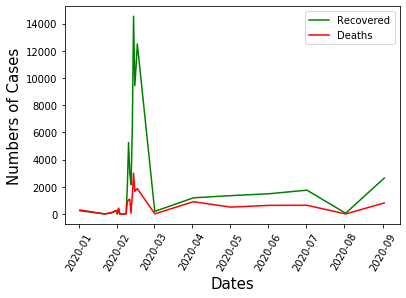

In [60]:
plt.plot('date_updated','Recovered',
        data = data_1.groupby(['date_updated']).sum().reset_index(drop=None),
        color = 'green')

plt.plot('date_updated','Deaths',
        data = data_1.groupby(['date_updated']).sum().reset_index(drop=None),
        color = 'red')

plt.xticks(rotation=60)
plt.ylabel('Numbers of Cases', fontsize=15)
plt.xlabel('Dates', fontsize=15)
plt.legend()
plt.show()

In [61]:
data_1.columns

Index(['Sno', 'Date', 'Province/State', 'Country', 'date_updated', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [81]:
data_2 = data_1.loc[data_1['Country']!='China']
data_2 = data_2.loc[data_2['Country']!='Mainland China']
#data_2 = data_1.loc[data_1['Country']!='Others']
data_2.Country.unique()

array(['US', 'Japan', 'Thailand', 'South Korea', 'Hong Kong', 'Macau',
       'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam',
       'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada',
       'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland',
       'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia',
       'Spain', 'UK', 'Belgium', 'Others', 'Egypt'], dtype=object)

(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 6 Text yticklabel objects>)

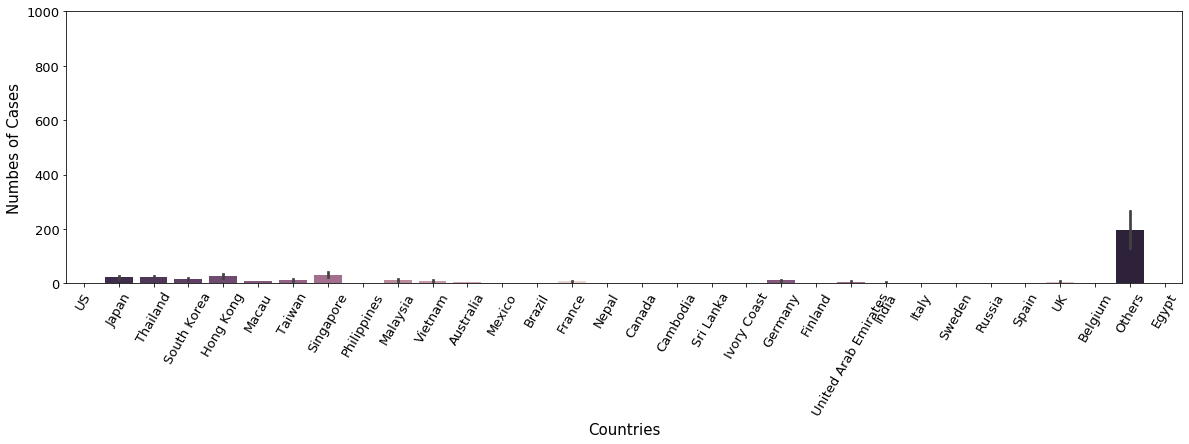

In [82]:
plt.rcParams['figure.figsize']=(20,5)

sns.barplot(
x= 'Country',
y = 'Confirmed',
data = data_2,
palette=sns.cubehelix_palette(15, reverse=True))

plt.ylim(0,1000)
plt.ylabel('Numbes of Cases', fontsize=15)
#plt.text(y)
plt.xlabel('Countries', fontsize=15)
plt.xticks(fontsize=13, rotation=60)
plt.yticks(fontsize=13)

In [86]:
print(type(data_2.groupby(['Country'])['Confirmed'].count()))

data_2.groupby(['Country'])['Confirmed'].count()

<class 'pandas.core.series.Series'>


Country
Australia                84
Belgium                  14
Brazil                    1
Cambodia                 22
Canada                   59
Egypt                     4
Finland                  20
France                   25
Germany                  22
Hong Kong                26
India                    19
Italy                    19
Ivory Coast               1
Japan                    27
Macau                    26
Malaysia                 25
Mexico                    1
Nepal                    24
Others                   11
Philippines              20
Russia                   18
Singapore                26
South Korea              27
Spain                    18
Sri Lanka                22
Sweden                   18
Taiwan                   26
Thailand                 27
UK                       18
US                      188
United Arab Emirates     20
Vietnam                  26
Name: Confirmed, dtype: int64

In [87]:
for x, y in enumerate(data_2.groupby(['Country'])['Confirmed'].count()):
    print(x,y)
    #plt.text(x, y+100, '%s' % y, ha = 'center', va='top')

0 84
1 14
2 1
3 22
4 59
5 4
6 20
7 25
8 22
9 26
10 19
11 19
12 1
13 27
14 26
15 25
16 1
17 24
18 11
19 20
20 18
21 26
22 27
23 18
24 22
25 18
26 26
27 27
28 18
29 188
30 20
31 26


In [90]:
x_index = data_2.groupby(['Country'])['Confirmed'].count().index.tolist()
x_index

['Australia',
 'Belgium',
 'Brazil',
 'Cambodia',
 'Canada',
 'Egypt',
 'Finland',
 'France',
 'Germany',
 'Hong Kong',
 'India',
 'Italy',
 'Ivory Coast',
 'Japan',
 'Macau',
 'Malaysia',
 'Mexico',
 'Nepal',
 'Others',
 'Philippines',
 'Russia',
 'Singapore',
 'South Korea',
 'Spain',
 'Sri Lanka',
 'Sweden',
 'Taiwan',
 'Thailand',
 'UK',
 'US',
 'United Arab Emirates',
 'Vietnam']

In [93]:
y_confirm= data_2.groupby(['Country'])['Confirmed'].count().tolist()
y_confirm

[84,
 14,
 1,
 22,
 59,
 4,
 20,
 25,
 22,
 26,
 19,
 19,
 1,
 27,
 26,
 25,
 1,
 24,
 11,
 20,
 18,
 26,
 27,
 18,
 22,
 18,
 26,
 27,
 18,
 188,
 20,
 26]

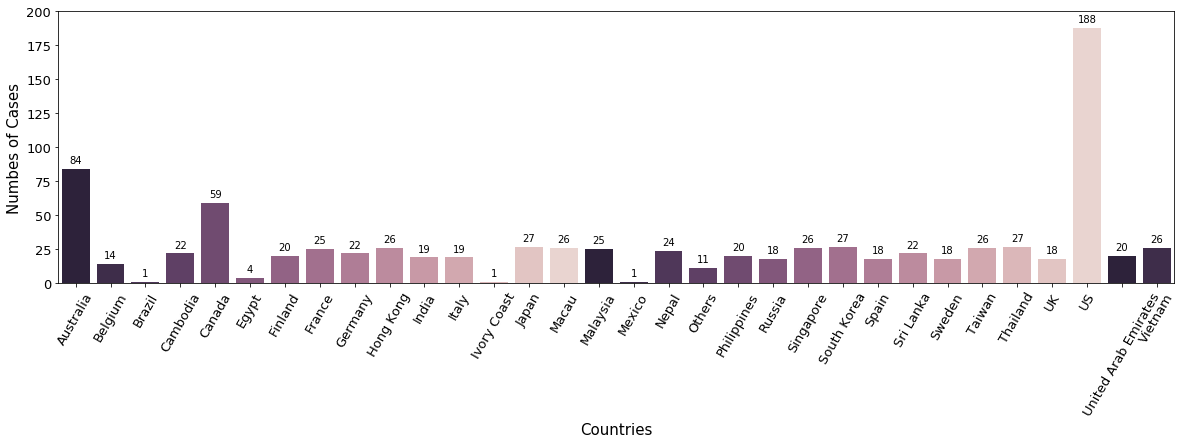

In [99]:
plt.rcParams['figure.figsize']=(20,5)

sns.barplot(
x= x_index,
y = y_confirm,
palette=sns.cubehelix_palette(15, reverse=True))

plt.ylim(0,200)
plt.ylabel('Numbes of Cases', fontsize=15)
#plt.text(y)
plt.xlabel('Countries', fontsize=15)
plt.xticks(fontsize=13, rotation=60)
plt.yticks(fontsize=13)

for x, y in enumerate(data_2.groupby(['Country'])['Confirmed'].count()):
   # print(x,y)
    plt.text(x, y+10, '%s' % y, ha = 'center', va='top')

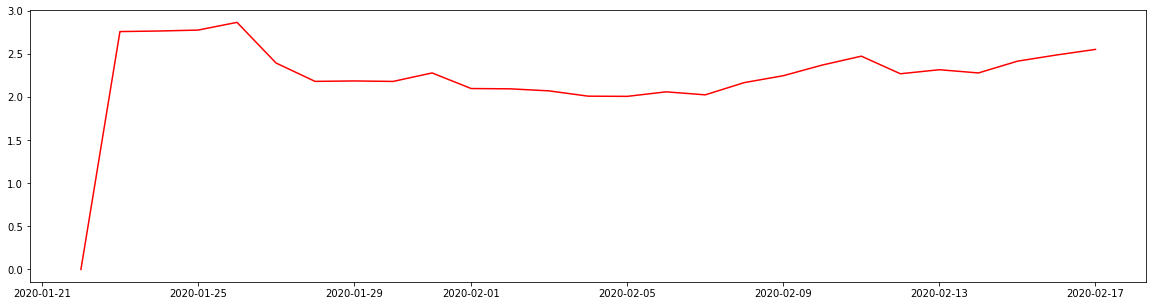

In [100]:
df_by_date['mrate'] = df_by_date.apply(
    lambda x: x['Deaths']*100/(x['Confirmed']), axis =1)

plt.plot('Date_date','mrate', data = df_by_date, color='red')
plt.show()

In [101]:
# 5. A closer look at the 10 most affected provinces in China

data_1.columns

Index(['Sno', 'Date', 'Province/State', 'Country', 'date_updated', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [116]:
data = pd.read_csv('2019_nCoV_data.csv')

data_1 = data[data['Country']=='Mainland China']

data_2 = data[data['Country']=='China']

df_province = data_1.append(data_2)

df_province

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
38,39,01/23/2020 12:00:00,Anhui,Mainland China,01/23/2020 12:00:00,9.0,0.0,0.0
39,40,01/23/2020 12:00:00,Beijing,Mainland China,01/23/2020 12:00:00,22.0,0.0,0.0
40,41,01/23/2020 12:00:00,Chongqing,Mainland China,01/23/2020 12:00:00,9.0,0.0,0.0
41,42,01/23/2020 12:00:00,Fujian,Mainland China,01/23/2020 12:00:00,5.0,0.0,0.0
42,43,01/23/2020 12:00:00,Gansu,Mainland China,01/23/2020 12:00:00,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
29,30,01/22/2020 12:00:00,Tianjin,China,01/22/2020 12:00:00,4.0,0.0,0.0
30,31,01/22/2020 12:00:00,Tibet,China,01/22/2020 12:00:00,0.0,0.0,0.0
32,33,01/22/2020 12:00:00,Xinjiang,China,01/22/2020 12:00:00,0.0,0.0,0.0
33,34,01/22/2020 12:00:00,Yunnan,China,01/22/2020 12:00:00,1.0,0.0,0.0


In [117]:
df_province = df_province.groupby(['Province/State']).max().reset_index(drop=None)

df_province

,Province/State,Sno,Date,Country,Last Update,Confirmed,Deaths,Recovered
0,Anhui,1650,02/17/2020 22:00:00,Mainland China,2020-09-02 01:23:00,973.0,6.0,280.0
1,Beijing,1658,02/17/2020 22:00:00,Mainland China,2020-09-02 03:43:00,381.0,4.0,114.0
2,Chongqing,1653,02/17/2020 22:00:00,Mainland China,2020-09-02 00:43:00,553.0,5.0,225.0
3,Fujian,1661,02/17/2020 22:00:00,Mainland China,2020-09-02 03:43:00,290.0,1.0,90.0
4,Gansu,1670,02/17/2020 22:00:00,Mainland China,2020-08-02 15:13:00,91.0,2.0,58.0
5,Guangdong,1646,02/17/2020 22:00:00,Mainland China,2020-09-02 01:53:00,1322.0,4.0,524.0
6,Guangxi,1663,02/17/2020 22:00:00,Mainland China,2020-09-02 00:33:00,238.0,2.0,53.0
7,Guizhou,1666,02/17/2020 22:00:00,Mainland China,2020-09-02 01:23:00,146.0,1.0,57.0
8,Hainan,1665,02/17/2020 22:00:00,Mainland China,2020-09-02 01:53:00,163.0,4.0,59.0
9,Hebei,1660,02/17/2020 22:00:00,Mainland China,2020-09-02 01:03:00,301.0,3.0,122.0


In [118]:
df_province=df_province.nlargest(10, 'Confirmed')
df_province

,Province/State,Sno,Date,Country,Last Update,Confirmed,Deaths,Recovered
13,Hubei,1645,02/17/2020 22:00:00,Mainland China,2020-09-02 03:03:00,59989.0,1789.0,7862.0
5,Guangdong,1646,02/17/2020 22:00:00,Mainland China,2020-09-02 01:53:00,1322.0,4.0,524.0
11,Henan,1647,02/17/2020 22:00:00,Mainland China,2020-09-02 01:13:00,1246.0,16.0,509.0
33,Zhejiang,1648,02/17/2020 22:00:00,Mainland China,2020-09-02 03:03:00,1171.0,0.0,507.0
14,Hunan,1649,02/17/2020 22:00:00,Mainland China,2020-09-02 01:13:00,1006.0,3.0,498.0
0,Anhui,1650,02/17/2020 22:00:00,Mainland China,2020-09-02 01:23:00,973.0,6.0,280.0
17,Jiangxi,1651,02/17/2020 22:00:00,Mainland China,2020-09-02 01:23:00,930.0,1.0,275.0
16,Jiangsu,1652,02/17/2020 22:00:00,Mainland China,2020-09-02 03:33:00,626.0,0.0,258.0
2,Chongqing,1653,02/17/2020 22:00:00,Mainland China,2020-09-02 00:43:00,553.0,5.0,225.0
24,Shandong,1654,02/17/2020 22:00:00,Mainland China,2020-09-02 02:13:00,541.0,2.0,191.0


In [119]:
df_province.columns

Index(['Province/State', 'Sno', 'Date', 'Country', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [120]:
df = df_province[['Province/State', 'Deaths', 'Recovered']]
df

,Province/State,Deaths,Recovered
13,Hubei,1789.0,7862.0
5,Guangdong,4.0,524.0
11,Henan,16.0,509.0
33,Zhejiang,0.0,507.0
14,Hunan,3.0,498.0
0,Anhui,6.0,280.0
17,Jiangxi,1.0,275.0
16,Jiangsu,0.0,258.0
2,Chongqing,5.0,225.0
24,Shandong,2.0,191.0


In [121]:
df = df.melt(id_vars=['Province/State'])
df

,Province/State,variable,value
0,Hubei,Deaths,1789.0
1,Guangdong,Deaths,4.0
2,Henan,Deaths,16.0
3,Zhejiang,Deaths,0.0
4,Hunan,Deaths,3.0
5,Anhui,Deaths,6.0
6,Jiangxi,Deaths,1.0
7,Jiangsu,Deaths,0.0
8,Chongqing,Deaths,5.0
9,Shandong,Deaths,2.0


Text(0, 0.5, 'Number of Cases')

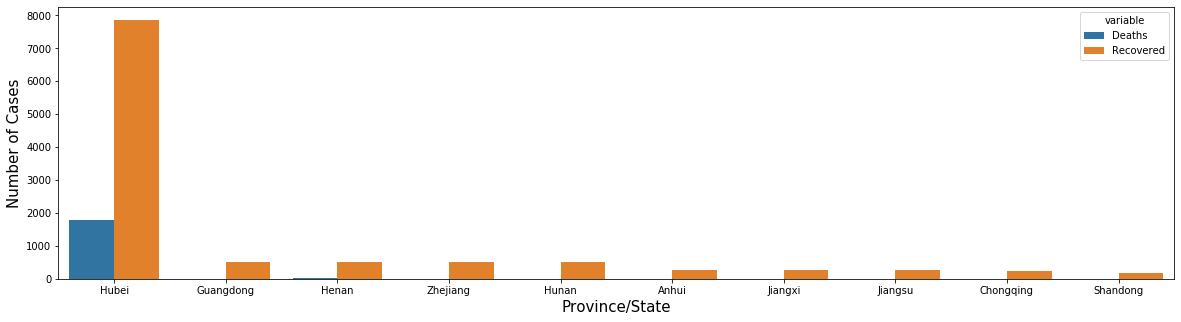

In [122]:
sns.barplot(
x='Province/State',
y = 'value',
hue = 'variable',
data = df)

plt.xlabel('Province/State', fontsize=15)
plt.ylabel('Number of Cases', fontsize=15)